In [136]:

import tensorflow
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

In [137]:

from keras.layers import Dense,Dropout
from keras.models import Sequential

In [138]:
from keras.datasets import mnist

In [139]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [140]:
%matplotlib inline

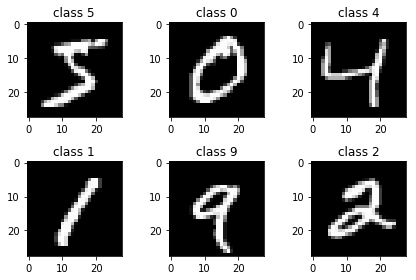

In [141]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='gray')
    plt.title("class {}".format(y_train[i]))
    

In [142]:
#pre-processing input
cat=10
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [143]:
#categorical conversion
Y_train=np_utils.to_categorical(y_train,cat)
Y_test=np_utils.to_categorical(y_test,cat)


In [144]:
#creating model
model=Sequential()
model.add(Dense(600,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(600,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [145]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [146]:
#training model
model.fit(X_train,Y_train,batch_size=128,epochs=4,validation_data=(X_test,Y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 46s 771us/step - loss: 0.2373 - acc: 0.9293 - val_loss: 0.1125 - val_acc: 0.9644
Epoch 2/4
60000/60000 [==============================] - 44s 742us/step - loss: 0.0973 - acc: 0.9696 - val_loss: 0.0786 - val_acc: 0.9765
Epoch 3/4
60000/60000 [==============================] - 45s 756us/step - loss: 0.0668 - acc: 0.9791 - val_loss: 0.0833 - val_acc: 0.9732
Epoch 4/4
60000/60000 [==============================] - 44s 737us/step - loss: 0.0555 - acc: 0.9820 - val_loss: 0.0710 - val_acc: 0.9790


In [147]:
#Testing
predicted_classes=model.predict_classes(X_test)
#correct indices
correct=np.nonzero(predicted_classes == y_test)[0]
#incorrect
incorrect=np.nonzero(predicted_classes != y_test)[0]


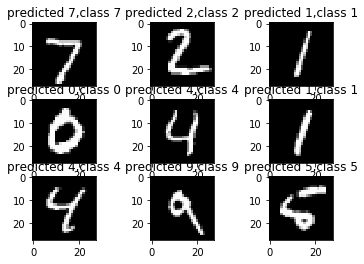

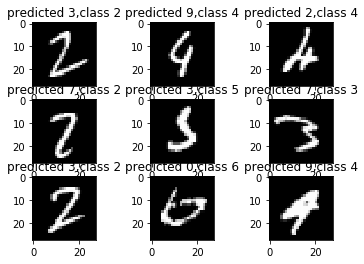

In [156]:
#visualise result
plt.figure()
plt.tight_layout(pad=4)
for i,indice in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    
    plt.imshow(X_test[indice].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("predicted {},class {}".format(predicted_classes[indice],y_test[indice]))
plt.figure()
plt.tight_layout(pad=4)
for i,indice in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    
    plt.imshow(X_test[indice].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("predicted {},class {}".format(predicted_classes[indice],y_test[indice]))    